# A minimal example for a fully connected feed forward Neural Net
a more extensive guide can be found at: <br>
https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/ <br>
https://www.youtube.com/watch?v=GlcnxUlrtek

In [2]:
import numpy as np
from IPython.display import Image

In [2]:
ni = 3 # number of inputs
n1 = 3 # number of neurons in first hidden layer
no = 2 # number of output neurons
input_layer_list = [ni, n1, no]

def create_weight_matrix(input_layer_list):
    weight_list = []
    for i in range(len(input_layer_list)-1):
        weight_list.append(np.random.randn(input_layer_list[i+1], input_layer_list[i]+1)) # +1 is the bias
    return weight_list

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

weight_list = create_weight_matrix(input_layer_list)

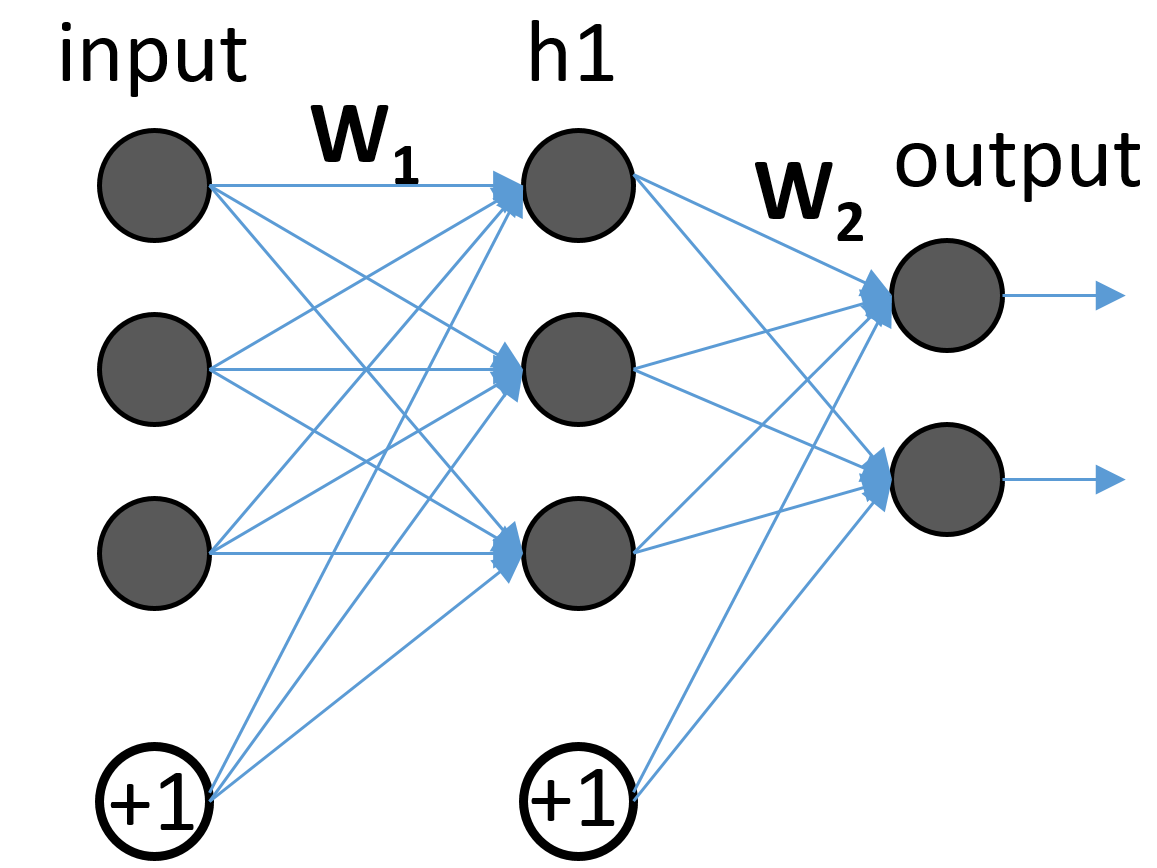

In [5]:
Image(filename='imgs/neural_net.png', width=250, height=250)

A forward propagation for this simple network can be calculated with 2 matrix multiplications which are fed into an activation function. <br>
$net_1 = \begin{bmatrix}w_{111} w_{112} w_{113} w_{114} \\ w_{121} w_{122} w_{123} w_{124} \\ w_{131} w_{132} w_{133} w_{134} \end{bmatrix} \begin{bmatrix} input_1 \\ input_2 \\ input_3 \\ +1 \end{bmatrix} $ <br>
$out_1 = \sigma(net_1) = \begin{bmatrix} out_{11} \\ out_{12} \\ out_{13}  \end{bmatrix} $<br>
<br>
$net_2 = \begin{bmatrix}w_{211} w_{12} w_{213} w_{214} \\ w_{221} w_{222} w_{223} w_{224}  \end{bmatrix} \begin{bmatrix} out_{11} \\ out_{12} \\ out_{13} \\ +1 \end{bmatrix} $ <br>
$out_2 = \sigma(net_2) = \begin{bmatrix} out_{21} \\ out_{22}  \end{bmatrix}$

In [34]:
def forward_propagation(inp, weight_list):
    activation = inp
    net_list = [] # intermediate results for backpropagation
    prev_out_list = [] 
    for i in range(len(weight_list)):
        prev_out_list.append(np.vstack([activation, 1]))
        activation = np.dot(weight_list[i], np.vstack([activation, 1]))
        net_list.append(activation)
        activation = sigmoid(activation)
        
        #print(activation)
    return activation, net_list, prev_out_list

# Backpropagation
with random weights in $W_1$ and $W_2$ we get random outputs of the network obviously. So how do we have to change the weights such that the network predicts the right output?

## Cost function so we can optimize the parameters against a criterion
$J = 0.5 * \sum (label - out_2)^2$

***Idea:*** <br>
Our cost function describes a surface in space with the height equal to the cost. We want to mimimize that cost (get to a local minimum). We can't just calculate the gradient at some point and follow it to the end since the cost function is not linear. So we want to go into the direction of the gradient for a step, calculate the new gradient there and repeat until we reach the minimum. So we need the derivative of the cost function by each parameter. <br>
new_w = old_w - lr* $\nabla E_{total}$(old_w)

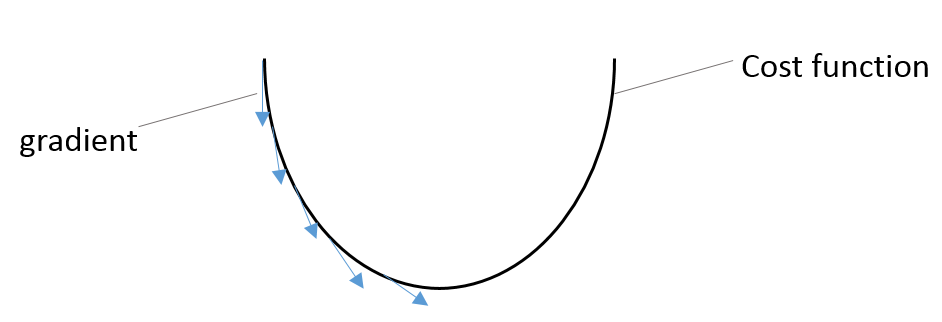

In [7]:
from IPython.display import Image
Image(filename='imgs/gradient_desc.PNG', width=450, height=450)

### Calculating the change in $W_2$

With the chain rule we can split this up in the calculations occuring in the neural net. <br>


$ \frac{\partial J}{\partial W_2} = \frac{\partial \sum 0.5 (label-out2)^2}{\partial W_2} $<br>
Since output is the only thing which is dependend on $W_2$, the derivative is: <br>
$\sum -1*(label-out_2)\frac{\partial out_2}{\partial W_2}$ <br>
Applying the chain rule splits up the last term <br>
$\sum -1*(label-out_2)\frac{\partial out_2}{\partial net_2} \frac{\partial net_2}{\partial W_2}$ <br>

$net = \sum_i w_i*inp_i$ <br>
$out = \sigma(net)$ <br>


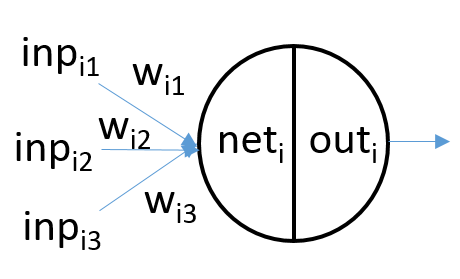

In [8]:
Image(filename='imgs/neuron.PNG', width=250, height=250)

The derivative of the output with respect to $net_2$ is just the derivative of the sigmoid/activation function which is $\sigma(x)*(1-\sigma(x))$ <br>
$\frac{\partial out_{2}}{\partial net_{2}} = \frac{\partial}{\partial net_2} \sigma(net_2)$ <br>
$\sigma = (1/(1+e^{-net_2}))$ <br>
$ \frac{\partial}{\partial net_2} (1/(1+e^{-net_2})) = 1/(1+e^{-net_2}) * (1 - 1/(1+e^{-net_2}))$ <br>
$ \frac{\partial \sigma}{\partial net_2} = \sigma(net_{2}) * (1- \sigma(net_{2}))$

$\frac{\partial net_i}{\partial w_i} = \frac{\partial}{\partial w_i} * \sum_i w_i * inp_i$ <br> 
the derivative of a constant is zero and every w except $w_i$ can be seen as a constant. Hence: <br>
$\frac{\partial net_i}{\partial w_i} = inp_i$

Putting all together: <br>
$ \frac{\partial J}{\partial W_2} = \sum -(label-output) \hspace{0.3cm}* \hspace{0.3cm} \sigma(net_{2}) * (1- \sigma(net_{2})) \hspace{0.3cm} * \hspace{0.3cm} inp_2$ <br>
The sum can be neglected if the vector product is implemented the right way!

### Calculating the change in W_1

Calculating the changes for $W_1$ is similar, the chain rule just has to be extended <br>
$ \frac{\partial J}{\partial W_1} = \frac{\partial \sum 0.5*(label - out_2)^2}{\partial w_1} = (out_2 - label) \frac{\partial out_2}{\partial w_1}$

$  (out_2 - label) \frac{\partial out_2}{\partial net_2} \frac{\partial net_2}{\partial w_1} $ <br>
With $\frac{\partial out_2}{\partial net_2}$ being $\sigma(net_{2}) * (1- \sigma(net_{2}))$ <br>
$\frac{\partial net_2}{\partial w_1} = \frac{\partial net_2}{\partial out_1} \frac{\partial out_1}{\partial w_1}$ <br>
$\frac{\partial out_1}{\partial w_1} = \frac{\partial out_1}{\partial net_1} \frac{\partial net_1}{\partial w_1}$ <br>
Putting all togeter: <br>
$ \frac{\partial J}{\partial W_1} =  \frac{\partial J}{\partial out_2} \frac{\partial out_2}{\partial net_2} \frac{\partial net_2}{\partial out_1} \frac{\partial out_1}{\partial net_1} \frac{\partial net_1}{\partial w_1}$

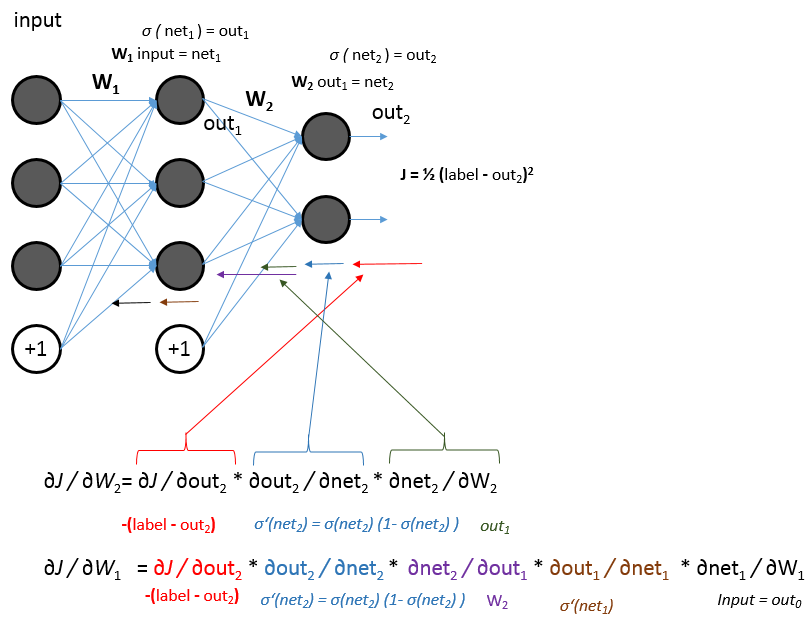

In [9]:
Image(filename='imgs/backward_prop.PNG', width=450, height=450)

In [54]:
def backpropagation(inp, label, weight_list):
    pred, net_list, prev_out_list= forward_propagation(inp, weight_list)
    i = 0
    lr = 0.1
    for net_i in reversed(net_list):
        deltaE_deltaW = pred-label * np.multiply(sigmoid(net_i), (1-sigmoid(net_i))) * np.transpose(prev_out_list[-i])
        # weight_list[-1] -= lr* deltaE_deltaW # update after the full backprop!!!

In [57]:
inp = np.transpose(np.array([[1,2,3]]))
label = np.transpose(np.array([[1,0]]))

backpropagation(inp, label, weight_list)

pred, net_list, prev_out_list= forward_propagation(inp, weight_list)
i = 0
lr = 0.1
error = pred-label
for net_i in reversed(net_list):
    deltaE_deltaW = error * np.multiply(sigmoid(net_i), (1-sigmoid(net_i))) * np.transpose(prev_out_list[-i])
    weight_list[-1] -= lr* deltaE_deltaW
    error = 

ValueError: operands could not be broadcast together with shapes (2,1) (3,1) 

In [59]:
net_i

array([[ 3.17467504],
       [ 6.7393719 ],
       [ 0.47054586]])

In [58]:
pred-label * np.multiply(sigmoid(net_i), (1-sigmoid(net_i)))

ValueError: operands could not be broadcast together with shapes (2,1) (3,1) 

In [36]:
pred, net_list, prev_out_list = forward_propagation(inp, weight_list)

In [38]:
prev_out_list[1]

array([[ 0.95987005],
       [ 0.99881801],
       [ 0.61551295],
       [ 1.        ]])

In [30]:
net_i = net_list[1]
pred-label * np.multiply(sigmoid(net_i), (1-sigmoid(net_i)) *net_list)

array([[ 0.1678345],
       [ 0.5900504]])

array([[ 0.3563979 ,  0.34696801,  0.43977195,  0.34668183],
       [ 0.67330423,  0.67330423,  0.67330423,  0.67330423]])

In [31]:
sigmoid(net_i)

array([[ 0.58879693],
       [ 0.67330423]])

In [27]:
label = np.transpose(np.array([[1,0]]))